In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn import under_sampling, over_sampling
import xgboost as xgb

In [ ]:
df = pd.read_csv('Train.csv', skip_blank_lines=True)
df_test = pd.read_csv('Eval.csv', skip_blank_lines=True)

In [ ]:
df.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,class_col
0,1.616623,-0.909091,3.0,-0.041629,0.284188,0.166667,0.0,0.0,1.0,2.0,0.0
1,-0.029310,1.500000,0.0,0.551353,-0.515812,0.166667,0.0,-0.5,0.0,0.0,0.0
2,1.598362,0.227273,0.0,-0.280171,-0.385897,-1.166667,0.0,-0.5,0.0,0.0,0.0
3,0.355677,0.954545,0.0,-0.101158,0.158718,-0.333333,0.0,0.0,0.0,0.0,0.0
4,-0.291358,0.590909,0.0,-0.299727,0.696838,0.000000,0.0,0.5,0.0,0.0,0.0


In [ ]:
df.describe()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,class_col
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,12.107321,0.013599,0.433970,500.308938,0.167428,0.079292,0.277340,0.010735,0.251830,0.740360,0.066510
std,528.035137,0.671062,4.324017,2181.510949,1.843019,0.860352,4.301489,0.571463,4.287297,1.108458,0.249173
min,-0.291358,-2.363636,0.000000,-0.528734,-0.744872,-1.333333,0.000000,-0.500000,0.000000,0.000000,0.000000
25%,-0.234323,-0.500000,0.000000,-0.275459,-0.471368,-0.500000,0.000000,-0.500000,0.000000,0.000000,0.000000
50%,0.001486,0.000000,0.000000,0.000119,0.004530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759917,0.500000,0.000000,0.721373,0.520085,0.500000,0.000000,0.500000,0.000000,1.000000,0.000000
max,95823.652220,2.590909,98.000000,318121.775400,305.932051,8.333333,98.000000,26.500000,98.000000,20.000000,1.000000


In [ ]:
df[df['class_col'].isnull()].sum()

variable_0    0.0
variable_1    0.0
variable_2    0.0
variable_3    0.0
variable_4    0.0
variable_5    0.0
variable_6    0.0
variable_7    0.0
variable_8    0.0
variable_9    0.0
class_col     0.0
dtype: float64

In [ ]:
df[~(df['class_col'].isnull())].count()

variable_0    100000
variable_1    100000
variable_2    100000
variable_3    100000
variable_4    100000
variable_5    100000
variable_6    100000
variable_7    100000
variable_8    100000
variable_9    100000
class_col     100000
dtype: int64

In [ ]:
df.shape[0] - df.dropna().shape[0]

47072

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(100000, 11)

In [ ]:
df_test.shape, df_test.isna().sum()

((50000, 10), variable_0    0
 variable_1    0
 variable_2    0
 variable_3    0
 variable_4    0
 variable_5    0
 variable_6    0
 variable_7    0
 variable_8    0
 variable_9    0
 dtype: int64)

### Distribution of Label variable

In [ ]:
df.groupby('class_col').agg(value_count = ('variable_0','count') ).reset_index().\
assign(class_dist = lambda x : x.value_count/x.value_count.sum() ,
       class_label = lambda x : x.class_col.astype('int')
       ).reset_index().set_index('class_label')

,index,class_col,value_count,class_dist
class_label,,,,
0,0,0.0,93349,0.93349
1,1,1.0,6651,0.06651


Text(0, 0.5, 'Labels data points percentage')

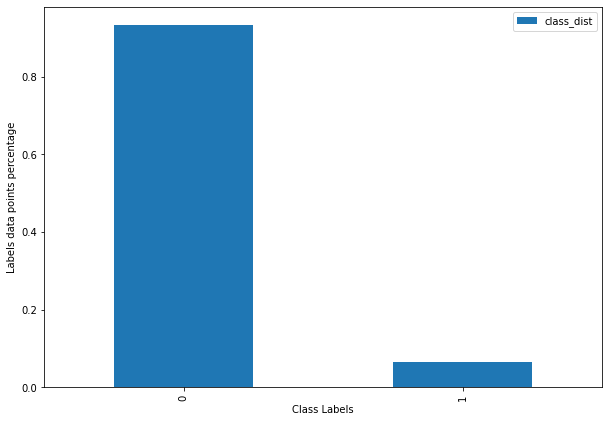

In [ ]:
df.groupby('class_col').agg(value_count = ('variable_0','count') ).reset_index().\
assign(class_dist = lambda x : x.value_count/x.value_count.sum() ,
       class_label = lambda x : x.class_col.astype('int')
       ).reset_index().set_index('class_label')[['class_dist']].plot(kind = 'bar', figsize = (10,7))
plt.xlabel('Class Labels')
plt.ylabel('Labels data points percentage')

### Distribution of Feature variables

In [ ]:
df_norm = pd.DataFrame(Normalizer().fit_transform(df.drop('class_col', axis = 1)), columns = df.columns[:-1])

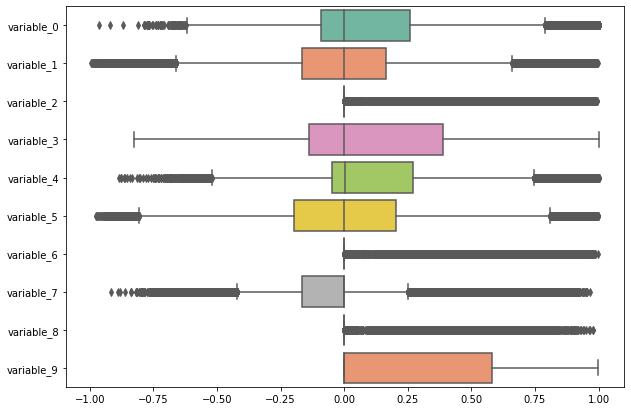

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(data=df_norm, orient="h", palette="Set2")

### Checking correlation

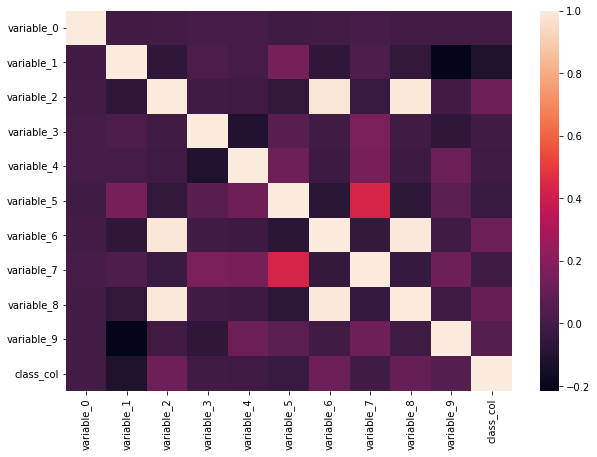

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr())

### Train Test Split

In [ ]:
X = df.drop(['class_col'], axis =1 )
y = df['class_col']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42 , stratify = y, test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape

((80000, 10), (20000, 10))

In [ ]:
print('Train shape {}'.format(Counter(y_train)))
print('Test shape {}'.format(Counter(y_test)))

Train shape Counter({0.0: 74679, 1.0: 5321})
Test shape Counter({0.0: 18670, 1.0: 1330})


### Base Model -  Logistic Regression

In [ ]:
logistic_clf = LogisticRegression(max_iter=1000).fit(X_train, y_train )
pred_y = logistic_clf.predict(X_test)
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     18670
         1.0       0.58      0.04      0.07      1330

    accuracy                           0.93     20000
   macro avg       0.76      0.52      0.52     20000
weighted avg       0.91      0.93      0.91     20000



#### Treating class imbalance - Undersampled

In [ ]:
X_train_un, y_train_un = under_sampling.RandomUnderSampler(random_state = 42).fit_resample(X_train, y_train)

In [ ]:
X_train.shape , X_train_un.shape, y_train.shape, y_train_un.shape

((80000, 10), (10642, 10), (80000,), (10642,))

In [ ]:
print('Undersampled label {}'.format(Counter(y_train_un)))

Undersampled label Counter({0.0: 5321, 1.0: 5321})


#### Treating class imbalance - Oversampled

In [ ]:
X_train_ov, y_train_ov = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [ ]:
X_train.shape , X_train_ov.shape, y_train.shape, y_train_ov.shape

((80000, 10), (149358, 10), (80000,), (149358,))

In [ ]:
print('Oversampled label {}'.format(Counter(y_train_ov)))

Oversampled label Counter({0.0: 74679, 1.0: 74679})


#### Training model on undersampled data -  Logistic

In [ ]:
logistic_clf_un = LogisticRegression(max_iter=1000).fit(X_train_un, y_train_un)
pred_y_un = logistic_clf_un.predict(X_test)
print(classification_report(y_test, pred_y_un))

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90     18670
         1.0       0.22      0.64      0.33      1330

    accuracy                           0.83     20000
   macro avg       0.60      0.74      0.62     20000
weighted avg       0.92      0.83      0.86     20000



#### Training model on Oversampled - Logistic

In [ ]:
logistic_clf_ov = LogisticRegression(max_iter=1000).fit(X_train_ov, y_train_ov)
pred_y_ov = logistic_clf_ov.predict(X_test)
print(classification_report(y_test, pred_y_ov))

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     18670
         1.0       0.15      0.67      0.25      1330

    accuracy                           0.73     20000
   macro avg       0.56      0.70      0.54     20000
weighted avg       0.92      0.73      0.80     20000



### Xgboost classifier

#### with normal data

In [ ]:
xgb_clf = xgb.XGBClassifier().fit(X_train, y_train)
pred_y_xgb = xgb_clf.predict(X_test)
print(classification_report(y_test, pred_y_xgb))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     18670
         1.0       0.65      0.19      0.29      1330

    accuracy                           0.94     20000
   macro avg       0.79      0.59      0.63     20000
weighted avg       0.92      0.94      0.92     20000



#### with undersampled data

In [ ]:
xgb_clf_un = xgb.XGBClassifier().fit(X_train_un, y_train_un)
pred_y_xgb_un = xgb_clf_un.predict(X_test)
print(classification_report(y_test, pred_y_xgb_un))

              precision    recall  f1-score   support

         0.0       0.98      0.79      0.88     18670
         1.0       0.21      0.77      0.33      1330

    accuracy                           0.79     20000
   macro avg       0.59      0.78      0.60     20000
weighted avg       0.93      0.79      0.84     20000



#### with oversampled data

In [ ]:
xgb_clf_ov = xgb.XGBClassifier().fit(X_train_ov, y_train_ov)
pred_y_xgb_ov = xgb_clf_ov.predict(X_test)
print(classification_report(y_test, pred_y_xgb_ov))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93     18670
         1.0       0.28      0.61      0.39      1330

    accuracy                           0.87     20000
   macro avg       0.63      0.75      0.66     20000
weighted avg       0.92      0.87      0.89     20000



### Final Prediction

In [ ]:
xgb_clf_ov.classes_

array([0., 1.])

In [ ]:
xgb_clf_ov.predict_proba(df_test)

array([[0.8965305 , 0.10346949],
       [0.866998  , 0.13300198],
       [0.74496895, 0.25503105],
       ...,
       [0.8411634 , 0.15883662],
       [0.98020923, 0.01979078],
       [0.7969959 , 0.20300409]], dtype=float32)

In [ ]:
final_pred = xgb_clf_ov.predict_proba(df_test)[:,1]
final_pred

array([0.10346949, 0.13300198, 0.25503105, ..., 0.15883662, 0.01979078,
       0.20300409], dtype=float32)

In [ ]:
output_data = pd.DataFrame(final_pred).reset_index().rename(columns = {'index':'row_id', 0:'yhat'}).\
assign(yhat = lambda x : x.yhat.apply(lambda x: np.round(x , 3)  ))

In [ ]:
output_data.head()

,row_id,yhat
0,0,0.103
1,1,0.133
2,2,0.255
3,3,0.052
4,4,0.462


In [ ]:
output_data.tail()

,row_id,yhat
49995,49995,0.133
49996,49996,0.547
49997,49997,0.159
49998,49998,0.020
49999,49999,0.203


In [ ]:
output_data.to_csv('test_pred.csv', index = False)